In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

ModuleNotFoundError: No module named 'sklearn.preprocessing.data'

In [11]:
# 4. Relevant Information:
#    Samples arrive periodically as Dr. Wolberg reports his clinical cases.
#    The database therefore reflects this chronological grouping of the data.
#    This grouping information appears immediately below, having been removed
#    from the data itself:
#      Group 1: 367 instances (January 1989)
#      Group 2:  70 instances (October 1989)
#      Group 3:  31 instances (February 1990)
#      Group 4:  17 instances (April 1990)
#      Group 5:  48 instances (August 1990)
#      Group 6:  49 instances (Updated January 1991)
#      Group 7:  31 instances (June 1991)
#      Group 8:  86 instances (November 1991)
#      -----------------------------------------
#      Total:   699 points (as of the donated datbase on 15 July 1992)

#    Note that the results summarized above in Past Usage refer to a dataset
#    of size 369, while Group 1 has only 367 instances.  This is because it
#    originally contained 369 instances; 2 were removed.  The following
#    statements summarizes changes to the original Group 1's set of data:

#    #####  Group 1 : 367 points: 200B 167M (January 1989)
#    #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
#    #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
#    #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
#    #####                  : Changed 0 to 1 in field 6 of sample 1219406
#    #####                  : Changed 0 to 1 in field 8 of following sample:
#    #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

# 5. Number of Instances: 699 (as of 15 July 1992)
# 6. Number of Attributes: 10 plus the class attribute
# 7. Attribute Information: (class attribute has been moved to last column)
#    #  Attribute                     Domain
#    -- -----------------------------------------
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)

# 8. Missing attribute values: 16
#    There are 16 instances in Groups 1 to 6 that contain a single missing 
#    (i.e., unavailable) attribute value, now denoted by "?".  
# 9. Class distribution:

#    Benign: 458 (65.5%)
#    Malignant: 241 (34.5%)

In [3]:
location = r"C:\Users\shubh\symbiosis ml16\datasets\breastcancer-rf.csv"

In [4]:
names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

In [5]:
# load the training data from breast cancer data set
df_training = pd.read_csv(location, names=names)

In [6]:
# examine the structure of data
df_training.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Examine any missing
df_training.isnull().sum()

id_number                  0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [17]:
# Cleaning
# We do some minor cleanage like setting the id_number to be the 
# data frame index, along with converting the diagnosis to the standard 
# binary 1, 0 representation using the map() function.

# Setting 'id_number' as our index
df_training.set_index(['id_number'], inplace = True) 

In [18]:
# Converted to binary to help later on with models and plots
df_training['diagnosis'] = df_training['diagnosis'].map({'M':1, 'B':0})

In [20]:
# all the features
names_index = names[2:]
names_index

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [21]:
df_training.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id_number,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# features available
df_training.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [23]:
df_training.shape

(569, 31)

In [25]:
# check for class imbalance
# examine the number of unique class labels
# data set does not suffer from class imbalance.
print(df_training.diagnosis.unique())
print(df_training.diagnosis.value_counts())

[1 0]
0    357
1    212
Name: diagnosis, dtype: int64


In [26]:
print(df_training.diagnosis.value_counts(normalize=True))

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


In [27]:
df_training.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [28]:
# data varies in distribution, this will be important when considering 
# classification models.

# pre-processing
# Random Forest does not require any pre-processing

In [29]:
# X_df = df_training.iloc[:, df_training.columns != 'diagnosis']
# y_df = df_training.iloc[:, df_training.columns == 'diagnosis']
X_df = df_training[names_index]
y_df = df_training['diagnosis']

In [30]:
print(type(X_df))
print(type(y_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.20, random_state =42)

In [32]:
# instantiate the RF classifier
# Set the random state for reproducibility
clf = RandomForestClassifier(random_state=42)

In [33]:
X_train = X_train.values
y_train = y_train.values

In [34]:
# train the algorithm utilizing the training and target class
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
# Variable Importance
# Get numerical feature importances
importances = list(clf.feature_importances_)
importances

[0.07070875852652238,
 0.006575694819293099,
 0.05866098072621878,
 0.01399705469211196,
 0.01012210099909593,
 0.0019237134838078498,
 0.0021572692743547835,
 0.10995070971888617,
 0.008025453949977576,
 0.003333374263403106,
 0.06202480367181799,
 0.003832344234070842,
 0.009663008594770445,
 0.06283545902452922,
 0.002782000712192183,
 0.004408529077759847,
 0.01433132209795599,
 0.007234021783473726,
 0.002804912141556622,
 0.008586381993643893,
 0.083409041645263,
 0.015484722256977418,
 0.03184810894288064,
 0.09713728084231674,
 0.00405296245964799,
 0.03585605229950856,
 0.0203828559132144,
 0.2373544725706544,
 0.00322830207046923,
 0.007288307213625225]

In [36]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(names_index, importances)]
feature_importances

[('radius_mean', 0.07),
 ('texture_mean', 0.01),
 ('perimeter_mean', 0.06),
 ('area_mean', 0.01),
 ('smoothness_mean', 0.01),
 ('compactness_mean', 0.0),
 ('concavity_mean', 0.0),
 ('concave_points_mean', 0.11),
 ('symmetry_mean', 0.01),
 ('fractal_dimension_mean', 0.0),
 ('radius_se', 0.06),
 ('texture_se', 0.0),
 ('perimeter_se', 0.01),
 ('area_se', 0.06),
 ('smoothness_se', 0.0),
 ('compactness_se', 0.0),
 ('concavity_se', 0.01),
 ('concave_points_se', 0.01),
 ('symmetry_se', 0.0),
 ('fractal_dimension_se', 0.01),
 ('radius_worst', 0.08),
 ('texture_worst', 0.02),
 ('perimeter_worst', 0.03),
 ('area_worst', 0.1),
 ('smoothness_worst', 0.0),
 ('compactness_worst', 0.04),
 ('concavity_worst', 0.02),
 ('concave_points_worst', 0.24),
 ('symmetry_worst', 0.0),
 ('fractal_dimension_worst', 0.01)]

In [38]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('concave_points_worst', 0.24),
 ('concave_points_mean', 0.11),
 ('area_worst', 0.1),
 ('radius_worst', 0.08),
 ('radius_mean', 0.07),
 ('perimeter_mean', 0.06),
 ('radius_se', 0.06),
 ('area_se', 0.06),
 ('compactness_worst', 0.04),
 ('perimeter_worst', 0.03),
 ('texture_worst', 0.02),
 ('concavity_worst', 0.02),
 ('texture_mean', 0.01),
 ('area_mean', 0.01),
 ('smoothness_mean', 0.01),
 ('symmetry_mean', 0.01),
 ('perimeter_se', 0.01),
 ('concavity_se', 0.01),
 ('concave_points_se', 0.01),
 ('fractal_dimension_se', 0.01),
 ('fractal_dimension_worst', 0.01),
 ('compactness_mean', 0.0),
 ('concavity_mean', 0.0),
 ('fractal_dimension_mean', 0.0),
 ('texture_se', 0.0),
 ('smoothness_se', 0.0),
 ('compactness_se', 0.0),
 ('symmetry_se', 0.0),
 ('smoothness_worst', 0.0),
 ('symmetry_worst', 0.0)]

In [39]:
np.arange(len(names_index))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [40]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
# df_feature_importance

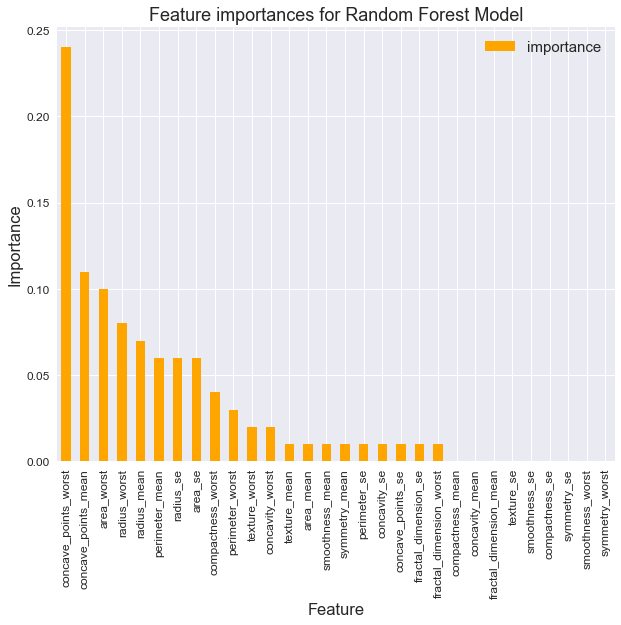

In [41]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Random Forest Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

In [42]:
# predict the test set
y_pred = clf.predict(X_test)

In [43]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5,1,'Actual vs. Predicted Confusion Matrix')

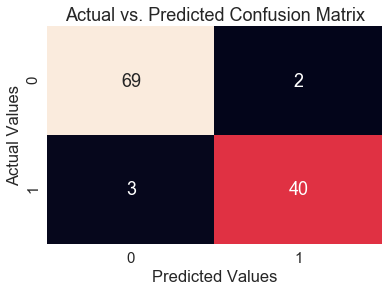

In [44]:
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [45]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)* 100)

model accuracy: 95.6140350877193


In [46]:
# ROC Curve Metrics

# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

predictions_prob = clf.predict_proba(X_test)[:, 1]

predictions_prob

array([0. , 1. , 1. , 0. , 0. , 1. , 1. , 0.8, 0.7, 0. , 0.1, 1. , 0. ,
       0.9, 0. , 0.9, 0. , 0. , 0. , 1. , 0.2, 0. , 1. , 0. , 0. , 0.3,
       0. , 0. , 0. , 1. , 0. , 0. , 0.3, 0. , 0. , 0. , 0.9, 0.1, 1. ,
       0.2, 0. , 1. , 0. , 0. , 0.4, 0. , 0. , 0.1, 0. , 0. , 1. , 1. ,
       0.2, 0.2, 0. , 0. , 0. , 1. , 0.8, 0. , 0. , 1. , 1. , 0. , 0. ,
       0. , 1. , 1. , 0. , 0. , 0.7, 1. , 0.1, 1. , 0. , 0.1, 0. , 0.4,
       0. , 0.1, 1. , 0. , 0.1, 0.9, 0.9, 1. , 0.9, 1. , 0. , 0. , 0. ,
       0.3, 0.3, 0.1, 0. , 0. , 1. , 0.9, 0. , 1. , 0.9, 0. , 1. , 1. ,
       0. , 0.1, 0. , 1. , 0.6, 0. , 0.9, 0. , 0.3, 1. ])

In [47]:
fpr2, tpr2, _ = metrics.roc_curve(y_test,
                                  predictions_prob,
                                  pos_label = 1)

In [48]:
auc_rf = metrics.auc(fpr2, tpr2)
auc_rf

0.9909924664264658

In [50]:
# Classification Report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97        71
          1       0.95      0.93      0.94        43

avg / total       0.96      0.96      0.96       114

